# Basic Text Processing in Python

In [8]:
# strings are defined in three ways

# double and single quotes don't matter
string1 = "hello world"
string2 = 'hello world'
string1 == string2

True

In [9]:
# multi-line strings can be made using triple quotes (using either double or single quotes)
multiLineStr1 = """Whoa
this string is
looooooooooooooooooong"""

multiLineStr2 = '''Whoa
this string is
looooooooooooooooooong'''

multiLineStr1 == multiLineStr2

True

In [10]:
# if you print it, newlines will manifest:
print(multiLineStr1)

Whoa
this string is
looooooooooooooooooong


In [11]:
# if you simply display its value, the newlines are shown
multiLineStr1

'Whoa\nthis string is\nlooooooooooooooooooong'

In [12]:
# strings can be concatenated in several ways:
str1 = "implicit " "concatenation"
str2 = "using " + "a " + "plus " + "sign"

# this way is fastest and provides additional ways to format e.g. numbers
str3 = "or {} {} {} {:10.3f}".format("using", "fancy", "formatting", 100.123456)
print(str1)
print(str2)
print(str3)

implicit concatenation
using a plus sign
or using fancy formatting    100.123


In [13]:
# strings are immutable
str1 = "immutable"
# This will give TypeError: 'str' object does not support item assignment
str1[0] = "I"

TypeError: 'str' object does not support item assignment

In [14]:
# to modify a string, you have to make a new string
str2 = "I{}".format(str1[1:])
print(str2)

# of course since this is Python there is a better way to capitalize strings:
str2 = str1.title()
print(str2)

Immutable
Immutable


In [15]:
# Q: whoa, what the heck did you just do up there?
# A: String slicing!!

# slices work like so [startIndex : endIndex : step]
# leaving out values gives the default value of startIndex = 0, endIndex = the end, step = 1
print(str1[1:])
print(str1[1:] == str1[1:len("immutable"):1])

# beginning of string
print(str1[0])

# negative values gives end of string
print(str1[-1])

# the start index is INCLUSIVE but the end index is EXCLUSIVE
print(str1[4:8])



mmutable
True
i
e
tabl


## Warning! Python 2's strings behave a bit differently from Python 3's

This is due to differences in the way Unicode is handled in Python 2 vs 3. Personally, I think Python 3 makes it easier to handle Unicode strings. If you get weird errors like "UnicodeDecodeError", it's because Python is trying and failing to decode the string. I can't explain it well, but go here: 

http://nedbatchelder.com/text/unipain/unipain.html#1 

or here: 

https://stackoverflow.com/questions/21129020/how-to-fix-unicodedecodeerror-ascii-codec-cant-decode-byte?answertab=oldest#tab-top 

to understand the problem better.

Typically these problems crop up when you get text from the internet which could contain weird symbols in some crazy encoding.

# Regular Expressions are Super Helpful if You Work on Text

In [16]:
# python's regular expression module
import re
# Awesome library for grabbing data from the internet. Included in Anaconda
import requests
# Awesome library for parsing HTML data. Included in Anaconda.
from bs4 import BeautifulSoup

# let's grab some data. Ray's page seems like a good place.
r = requests.get("http://ptucha.com/")

# convert to "soup" from BeautifulSoup to extract HTML stuff easily
soup = BeautifulSoup(r.text)

# look up list comprehensions to understand this. Basically we are getting every item of type "disc" on the HTML page
# then we get the "li" tag (list item) from each item of type disc, and putting its text in a list
data = [listItem.li.text for listItem in soup.find_all(type='disc')]

# print the first item in the lsit. Hey! That looks like good data to analyze.
print(data[0])

 R.W. Ptucha, A. Savakis, LGE-KSVD:  Robust Sparse Representation Classification, IEEE Transactions on Image Processing, Volume 23, Issue 4, 2014.  


/Users/lr/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/lr/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [18]:
# Some of it we don't want though
print(data[53])

 Image Recomposition from Face Detection and Facial Features, U.S. Patent 8,811,747, Jan. 20, 2015. 


In [19]:
# Lets grab only publications, patents, and presentations
# Every publication has "R.W. Ptucha" in it
# Every patent has "U.S. Patent" in it

# make some regular expressions to match. These are super simple (just the text we want)
# the 'r' in front of the string means raw string (I want this so the '.' in the string isn't a match-all character in the regex)
pubRe = re.compile(r"R.W. Ptucha")
patentRe = re.compile(r"U.S. Patent")

# match those regexes, strip whitespace off the beginning/end of each match
goodData = [d.strip() for d in data if pubRe.search(d) or patentRe.search(d)]

# Wait. Where are the quotes in the paper title?
print(goodData[-1])

Method For Determining Necessary Resolution For Zoom And Crop Of Images, U.S. Patent 6,643,416, Nov. 4, 2003.


In [20]:
# Hmmmmm. DARN INTERNET UNICODE!!
print(repr(goodData[-1]))

u'\x93Method For Determining Necessary Resolution For Zoom And Crop Of Images\x94, U.S. Patent 6,643,416, Nov. 4, 2003.'


In [21]:
# fix those unicode code points. \x93 and \x94 are quotes.
# use regular expression to match those characters and replace (sub) them with quote character
goodData = [re.sub("\x93|\x94", '"', d).strip() for d in data if pubRe.search(d) or patentRe.search(d)]
print(repr(goodData[-1]))

u'"Method For Determining Necessary Resolution For Zoom And Crop Of Images", U.S. Patent 6,643,416, Nov. 4, 2003.'


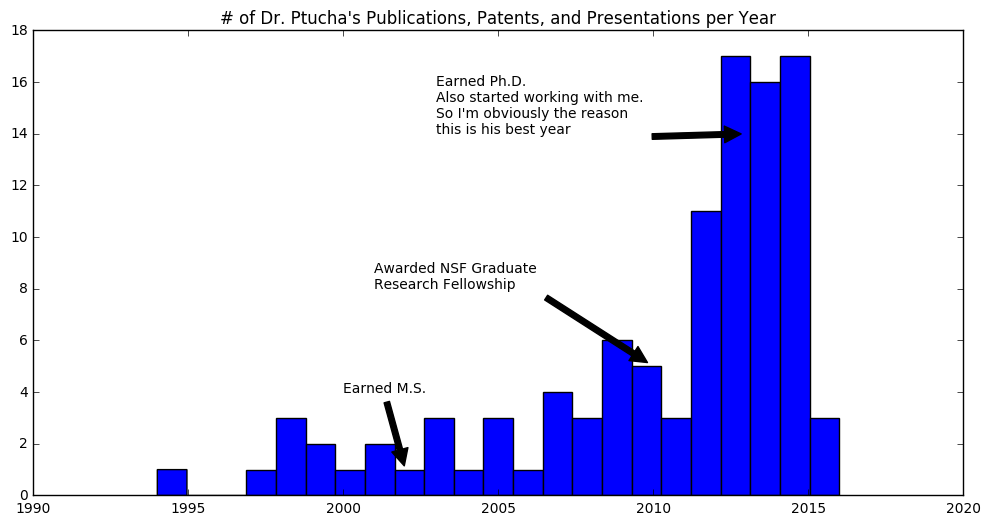

In [22]:
# Let's do some analysis...finally...
# Let's figure out what years Dr. Ptucha has been most prolific

# matplotlib is a plotting library for python
import matplotlib.pyplot as plt
# make the plots inline with the notebook
%matplotlib inline
# numpy is a numerical package for working with fast, efficient, vectorized matrices like in MATLAB
import numpy as np

# look for numbers between 19xx and 20xx
yearRe = re.compile("19\d{2}|20\d{2}")

# make sure the matched object is not None to call the group() function which returns the actual matched text
years = np.array([int(yearRe.search(d).group(0)) for d in data if yearRe.search(d) is not None])
numBins = np.max(years) - np.min(years) + 1
plt.figure(figsize=(12, 6))
plt.hist(years, numBins)
plt.title("# of Dr. Ptucha's Publications, Patents, and Presentations per Year")
plt.annotate("Earned M.S.", xy=(2002, 1), xytext=(2000, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate("Earned Ph.D.\nAlso started working with me.\nSo I'm obviously the reason\nthis is his best year", xy=(2013, 14), xytext=(2003, 14),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate("Awarded NSF Graduate\nResearch Fellowship", xy=(2010, 5), xytext=(2001, 8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

### Good. You're ready now.

In [23]:
# Lets take a look at the unigrams in the titles of his papers/patents/presentations
import nltk

# regex matches anything inbetween quotation marks
titles = [re.search('".*"', d).group(0) for d in goodData if re.search('".*"', d) is not None]

# We don't want these symbols
symbols = {"``", "''", ":"}

# tokenize each title, lowercase the tokens to normalize everything, place them all in a list
tokens = [token.lower() for title in titles for token in nltk.word_tokenize(title) if token not in symbols]
print(tokens[:5])

[u'lge-ksvd', u'robust', u'sparse', u'representation', u'classification']


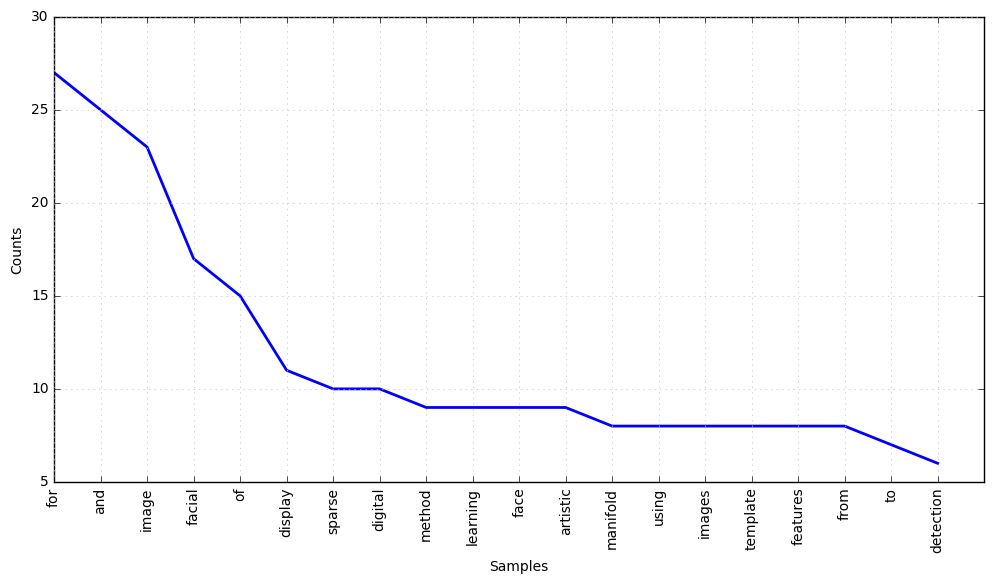

In [24]:
# Lets get a count of the tokens (NLTK has a nice convenient class to do this called FreqDist)
# Python also has collections.Counter() which would do the same thing
# but we don't get cool plotting then
frequencyDistribution = nltk.FreqDist(tokens)
plt.figure(figsize=(12, 6))
# plot the top 20 tokens
frequencyDistribution.plot(20)

http://text-analytics101.rxnlp.com/2014/10/all-about-stop-words-for-text-mining.html

In [ ]:
# Hrmm..this is a good start...but we don't care about words like "for" and "and"
from nltk.corpus import stopwords

# let's use NLTK's built-in list of "stopwords"
stoplist = stopwords.words('english')
print(stoplist[:15])

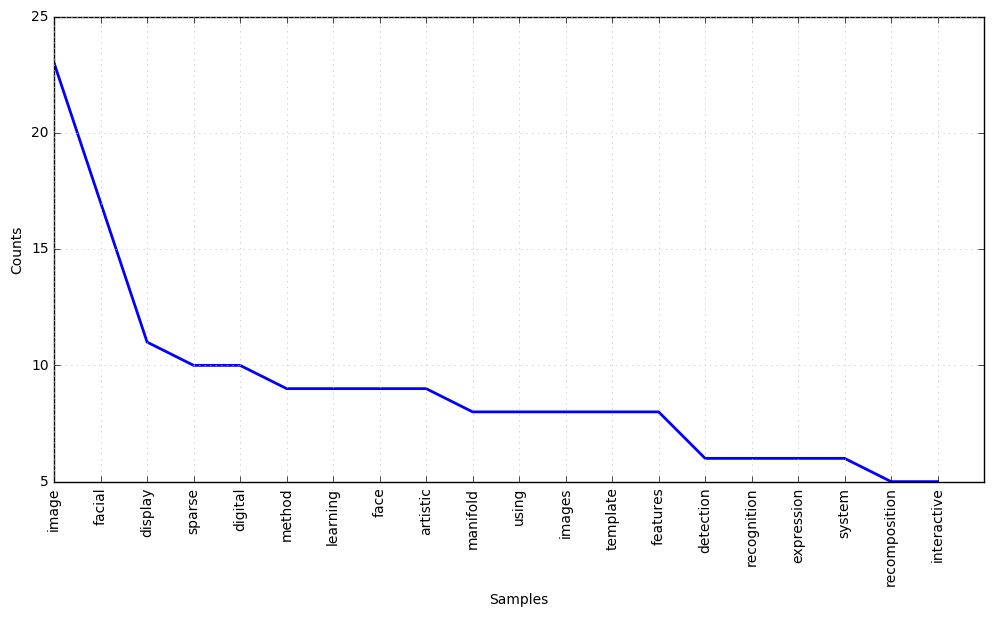

In [26]:
tokens = [token for token in tokens if token not in stoplist]
frequencyDistribution = nltk.FreqDist(tokens)
plt.figure(figsize=(12, 6))
# plot the top 20 tokens
frequencyDistribution.plot(20)
# MUCH BETTER!!

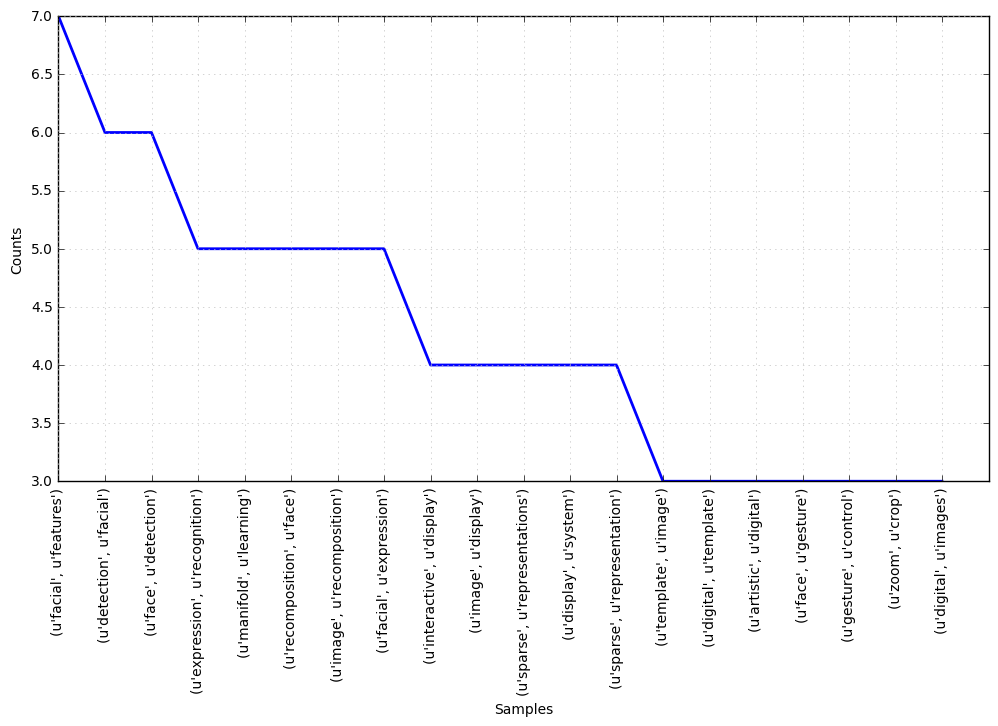

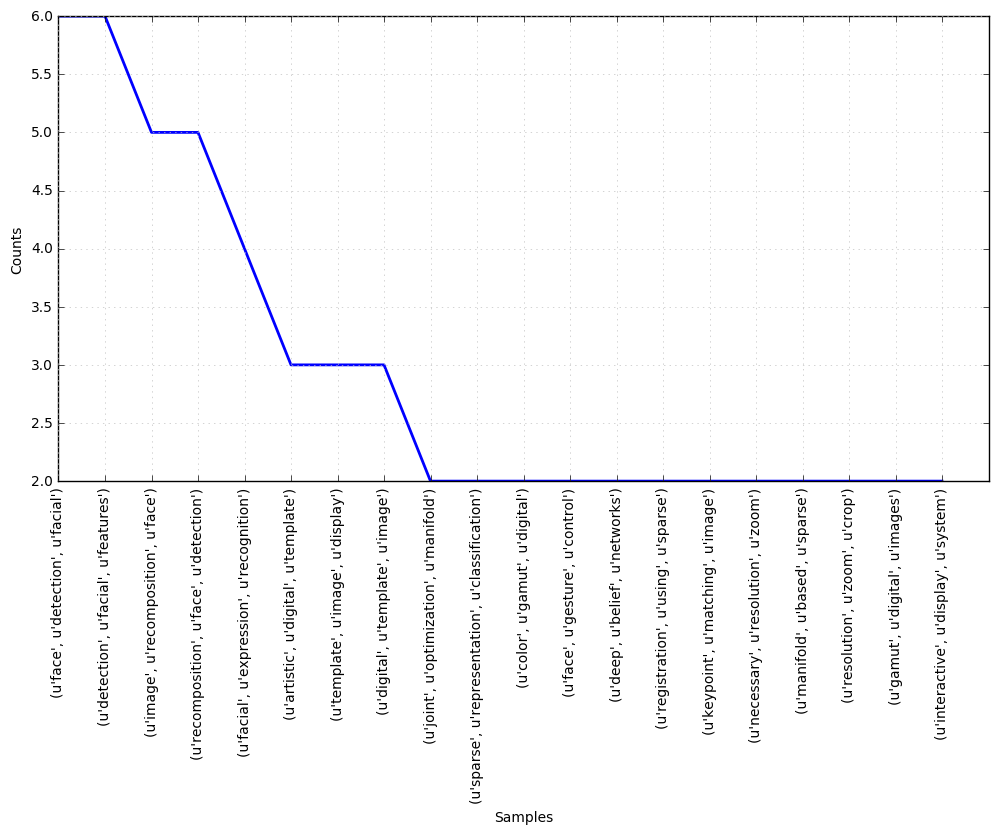

In [27]:
# So...we know Dr. Ptucha likes images, sparse things, digital stuff, manifolds, recognition...
# Let's get some additional context with bigrams and trigrams
from nltk.util import bigrams, trigrams
from itertools import chain

# we don't want to use the tokens all mashed together like before because we don't want to
# connect the last token in a title with the first token in a different title
# so we do it per title
tokensPerTitle = [nltk.word_tokenize(title) for title in titles]
tokensPerTitle = [[token.lower() for token in t if token.lower() not in symbols and token.lower() not in stoplist] for t in tokensPerTitle]

# now we need to do some crazy python list unpacking which you might not understand
# but this is just making a single list of the bigrams of each title
b = list(chain(*[(list(bigrams(tokens))) for tokens in tokensPerTitle]))
# same with trigrams
t = list(chain(*[(list(trigrams(tokens))) for tokens in tokensPerTitle]))

fdist = nltk.FreqDist(b)
plt.figure(figsize=(12, 6))
# plot the top 20 bigrams
fdist.plot(20)

fdist = nltk.FreqDist(t)
plt.figure(figsize=(12, 6))
# plot the top 20 trigrams
fdist.plot(20)

## Machine Learning with Scikit-learn

### We are going to predict if a title will have the word "image" in it.

In [29]:
# Cool. So now we know he's doing something with facial expression recognition, manifold learning, and sparse representations!
# Notice how the frequency of the n-grams decreases as you go to higher-order n. This is why stuff is so sparse in NLP
# Okay let's do some machine learning

# First of all, words like images and image should be counted as the same word, so let's "lemmatize" them
# which means to convert them to their base "lemma" e.g. studying -> study
from nltk.stem.wordnet import WordNetLemmatizer

# we would probably want to do Parts-of-Speech (POS) tagging to do this better
# but this will work for now
def dumbLemmatize(word):
    wnl = WordNetLemmatizer()
    # try to lemmatize verbs first
    lemma = wnl.lemmatize(word, 'v')
    # if nothing changed, try it as a noun
    if lemma == word:
        return wnl.lemmatize(word)
    return lemma
    
titles = [[dumbLemmatize(token) for token in title] for title in tokensPerTitle]

# Okay, so now I'm gonna set up data for training and testing.
labels = ["image" in title for title in titles]
print(labels)

[False, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True]


In [ ]:
# and now we want to remove the word "image" from the titles, so the ML algorithm doesn't pick up on that feature
# lists are modified in place because they are a mutable object in Python
for title in titles:
    while "image" in title:
        title.remove("image")

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

# scikit's vectorizers actually can do all the tokenizing, stoplisting stuff we did before
# and also the n-gram extraction!
# so actually we need to convert the title tokens back to single strings because that's what the vectorizers want
Xdata = [" ".join(title) for title in titles]

# We're going to use Scikit's "Gridsearch" function to EXHAUSTIVELY work through a bunch of parameters to figure out what's best
# We're also going to try these two feature vectorizers
# And we're gonna test out SVMs vs Naive Bayes

# These are the feature vectorizers that will convert the text to number matrices
tfidf = TfidfVectorizer()
count = CountVectorizer()

# Pipelines are essentially steps to take to complete the experiment
# in this case, we are going to extract the features, then pass them to a classifier
LinSVMTfidf = Pipeline([('feats', tfidf), ('clf', LinearSVC())])
LinSVMCount = Pipeline([('feats', count), ('clf', LinearSVC())])

SVMTfidf = Pipeline([('feats', tfidf), ('clf', SVC())])
SVMCount = Pipeline([('feats', count), ('clf', SVC())])

NBTfidf = Pipeline([('feats', tfidf), ('clf', MultinomialNB())])
NBCount = Pipeline([('feats', count), ('clf', MultinomialNB())])

# And these are the parameters we want to test out for those pipelines
# you separate the different parameters that you would normally pass into the
# classifier construction call using a double underscore
# e.g. SVC(C=1, gamma=10) becomes clf__C, clf__gamma because we called the
# classifier in the pipeline "clf"
LinSVMParams = {'clf__C': (.01, .1, 1, 10, 100), 'feats__ngram_range': ((1,1), (1,2), (1,3)), 'feats__binary': (True, False)}
SVMParams = {'clf__C': (.01, .1, 1, 10, 100), 'clf__gamma': (.01, .1, 1, 10, 100), 'feats__ngram_range': ((1,1), (1,2), (1,3)), 'feats__binary': (True, False)}
NBParams = {'feats__ngram_range': ((1,1), (1,2), (1,3)), 'feats__binary': (True, False)}



In [ ]:
def printGridSearchResults(gs, params, x, y):
    """
    Prints the results of exhaustive grid search for best parameters in tuning procedure
    :param gs:
    :param params:
    :param x:
    :param y:
    :return:
    """
    pipe = gs.fit(x, y)
    for param_name in sorted(params.keys()):
        print("%s: %r" % (param_name, pipe.best_params_[param_name]))
    print("Best score: " + str(pipe.best_score_))
    print("Mean score: " + str(pipe.grid_scores_))
    print("-------------------------------------------------------------------------------")

# lets make some gridsearch objects and see what happens
# n_jobs=-1 means all processors used
# cv=5 means 5 fold cross validation
gsLinSVMTfidf = GridSearchCV(LinSVMTfidf, LinSVMParams, n_jobs=-1, cv=5)
gsLinSVMCount = GridSearchCV(LinSVMCount, LinSVMParams, n_jobs=-1, cv=5)
gsSVMTfidf = GridSearchCV(SVMTfidf, SVMParams, n_jobs=-1, cv=5)
gsSVMCount = GridSearchCV(SVMCount, SVMParams, n_jobs=-1, cv=5)
gsNBTfidf = GridSearchCV(NBTfidf, NBParams, n_jobs=-1, cv=5)
gsNBCount = GridSearchCV(NBCount, NBParams, n_jobs=-1, cv=5)

print("LinearSVM with TF-IDF")
printGridSearchResults(gsLinSVMTfidf, LinSVMParams, Xdata, labels)

print("LinearSVM with Counts")
printGridSearchResults(gsLinSVMCount, LinSVMParams, Xdata, labels)

print("SVM with TF-IDF")
printGridSearchResults(gsSVMTfidf, SVMParams, Xdata, labels)

print("SVM with Counts")
printGridSearchResults(gsSVMCount, SVMParams, Xdata, labels)

print("NB with TF-IDF")
printGridSearchResults(gsNBTfidf, NBParams, Xdata, labels)

print("NB with Counts")
printGridSearchResults(gsNBCount, NBParams, Xdata, labels)

In [ ]:
# So looks like our best classifier was an RBF SVM with a binary count vectorizer, C = 10, gamma = 0.01, with only unigrams
# Best score: 0.865384615385

# Let's look at the best words (we must use linear SVM to get weights)
def printNMostInformative(vectorizer, clf, N):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
        
clf = LinearSVC(C=.01)
feats = CountVectorizer(binary=True, ngram_range=(1,1))
LinearSVMPipe = Pipeline([('feats', feats), ('clf', clf)])
LinearSVMPipe.fit(Xdata, labels)
printNMostInformative(feats, clf, 10)

In [ ]:
# COOL! So class 2 = the class with the word "image" in it. Results makes sense. "Digital image", keypoints in images,
# image templates, etc
# The other class is anything without the word "image"
# Obviously our dataset is small, so simple things like binary count vectorizers on unigrams work well.
# But as sizes increase, you'll probably want to use TF-IDF on uni-, bi-, and trigrams